#Activation Functions

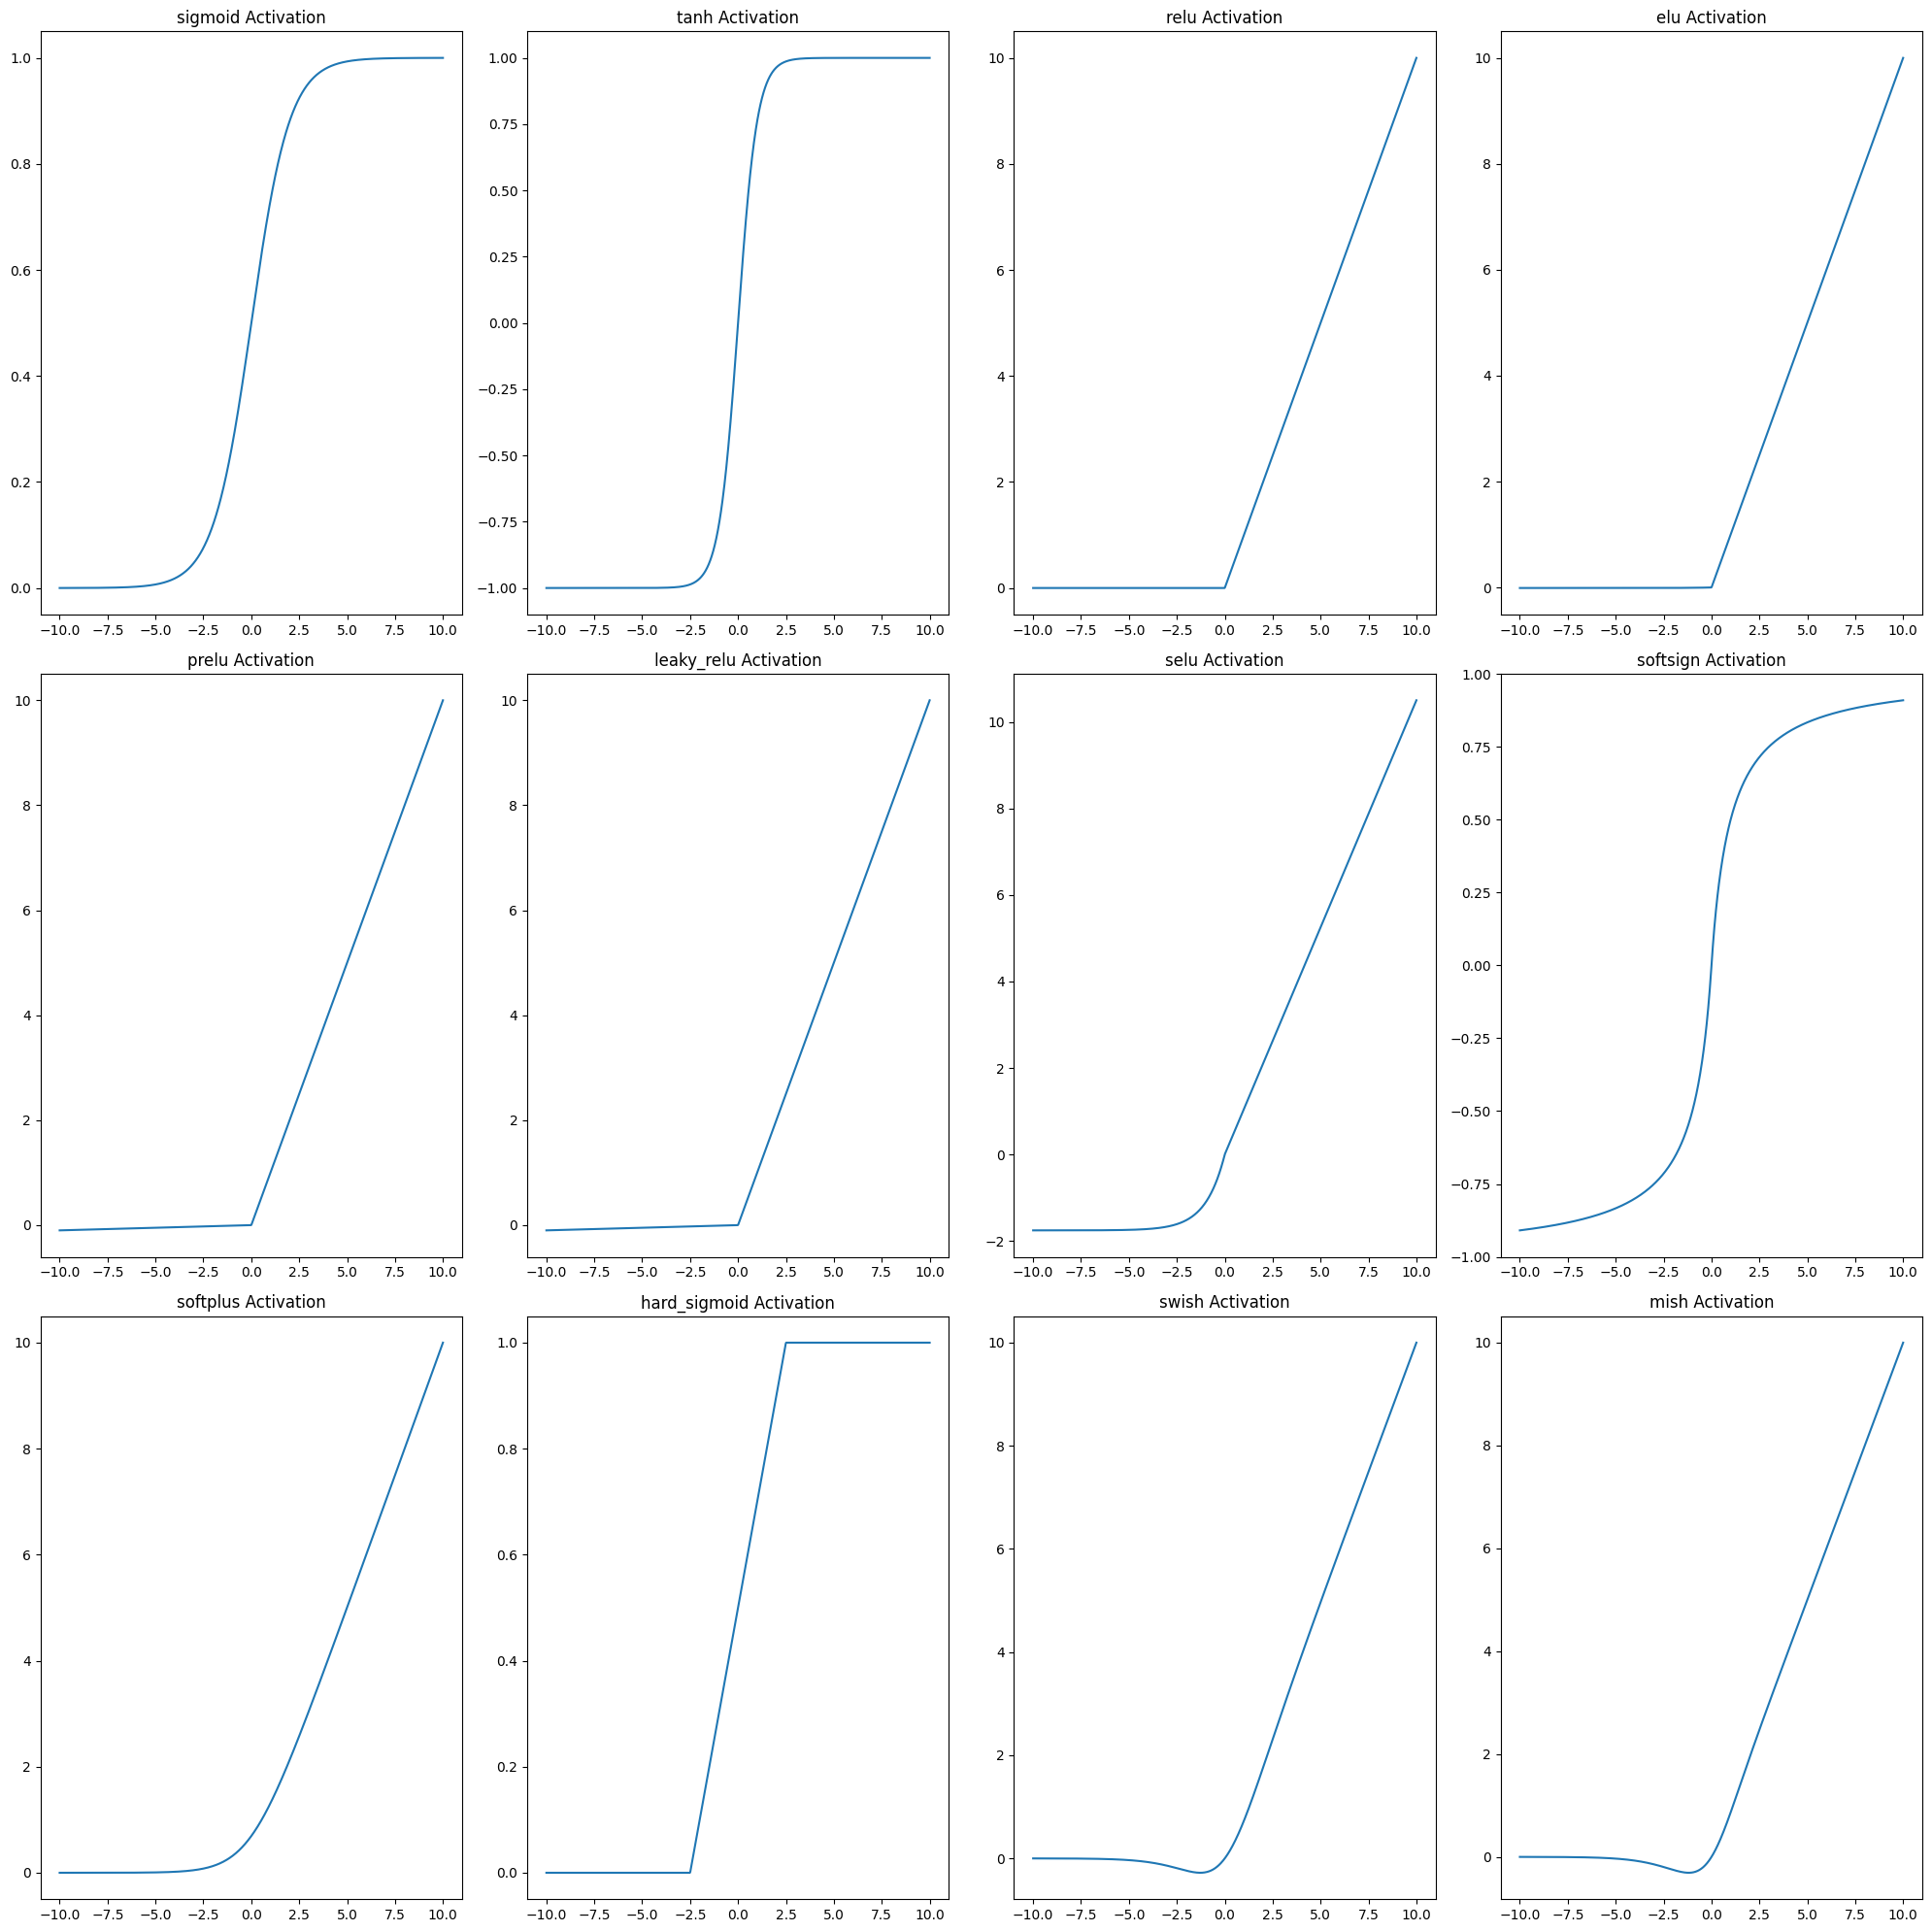

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def elu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def prelu(x, alpha=0.01):
    return np.maximum(x, alpha * x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def selu(x, lamda=1.0507, alpha=1.67326):
    return lamda * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def softsign(x):
    return x / (1 + np.abs(x))

def softplus(x):
    return np.log1p(np.exp(x))

def hard_sigmoid(x):
    return np.clip(0.2 * x + 0.5, 0, 1)

def swish(x):
    return x * sigmoid(x)

def mish(x):
    return x * np.tanh(np.log1p(np.exp(x)))

activations = [
    sigmoid, tanh, relu, elu, prelu, leaky_relu,
    selu, softsign, softplus, hard_sigmoid, swish, mish
]

x = np.linspace(-10, 10, 1000)
plt.figure(figsize=(20, 20))

for i, activation in enumerate(activations, 1):
    plt.subplot(3, 4, i)
    plt.plot(x, activation(x))
    plt.title(activation.__name__ + ' Activation')

plt.tight_layout()
plt.show()

#Custom Activation

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(layer_sizes):
    np.random.seed(42)
    weights = [np.random.rand(layer_sizes[i], layer_sizes[i + 1]) for i in range(len(layer_sizes) - 1)]
    return weights

def forward_propagation(X, weights):
    layer_outputs = [X]
    for weight in weights:
        layer_input = np.dot(layer_outputs[-1], weight)
        layer_output = sigmoid(layer_input)
        layer_outputs.append(layer_output)
    return layer_outputs

def backward_propagation(X, y, layer_outputs, weights):
    errors = [y - layer_outputs[-1]]
    deltas = [errors[-1] * sigmoid_derivative(layer_outputs[-1])]

    for i in range(len(weights) - 1, 0, -1):
        errors.insert(0, deltas[0].dot(weights[i].T))
        deltas.insert(0, errors[0] * sigmoid_derivative(layer_outputs[i]))

    return deltas

def update_weights(layer_outputs, deltas, weights, learning_rate):
    for i in range(len(weights)):
        weights[i] += layer_outputs[i].T.dot(deltas[i]) * learning_rate
    return weights

def train_neural_network(X, y, layer_sizes, epochs, learning_rate):
    weights = initialize_weights(layer_sizes)

    for epoch in range(epochs):
        layer_outputs = forward_propagation(X, weights)
        deltas = backward_propagation(X, y, layer_outputs, weights)

        weights = update_weights(layer_outputs, deltas, weights, learning_rate)

        if epoch % 100 == 0:
            mse = np.mean(np.square(y - layer_outputs[-1]))
            print(f"Epoch {epoch}, Mean Squared Error: {mse}")

    return weights

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

layer_sizes = [2, 4, 3, 1]
epochs = 1000
learning_rate = 0.1

trained_weights = train_neural_network(X, y, layer_sizes, epochs, learning_rate)


Epoch 0, Mean Squared Error: 0.28428764529343764
Epoch 100, Mean Squared Error: 0.24999118368636097
Epoch 200, Mean Squared Error: 0.24997863841178564
Epoch 300, Mean Squared Error: 0.2499765668517072
Epoch 400, Mean Squared Error: 0.24997447120437605
Epoch 500, Mean Squared Error: 0.24997234681660674
Epoch 600, Mean Squared Error: 0.2499701913495468
Epoch 700, Mean Squared Error: 0.2499680024119372
Epoch 800, Mean Squared Error: 0.24996577755544586
Epoch 900, Mean Squared Error: 0.24996351427030306


# Grey Wolf Optimization Algorithm

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, weights):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    hidden_input = np.dot(X_bias, weights['input_hidden'])
    hidden_output = sigmoid(hidden_input)

    hidden_output_bias = np.hstack((np.ones((hidden_output.shape[0], 1)), hidden_output))
    output_input = np.dot(hidden_output_bias, weights['hidden_output'])
    output = sigmoid(output_input)

    return output

def initialize_weights(input_size, hidden_size, output_size):
    weights = {
        'input_hidden': np.random.rand(input_size + 1, hidden_size),
        'hidden_output': np.random.rand(hidden_size + 1, output_size)
    }
    return weights

def decode_wolf_position(X, input_size, hidden_size, output_size):
    input_hidden_size = (input_size + 1) * hidden_size
    hidden_output_size = (hidden_size + 1) * output_size

    input_hidden_end = input_hidden_size
    hidden_output_end = input_hidden_size + hidden_output_size

    weights = {
        'input_hidden': X[:input_hidden_end].reshape((input_size + 1, hidden_size), order='F'),
        'hidden_output': X[input_hidden_end:hidden_output_end].reshape((hidden_size + 1, output_size), order='F')
    }

    return weights

def fitness(X, X_train, y_train, input_size, hidden_size, output_size):
    weights = decode_wolf_position(X, input_size, hidden_size, output_size)
    predicted_output = forward_propagation(X_train, weights)
    mse = np.mean(np.square(y_train - predicted_output))
    return mse

def gwo_optimizer(X_train, y_train, input_size, hidden_size, output_size, num_wolves, epochs):
    num_dimensions = (input_size + 1) * hidden_size + (hidden_size + 1) * output_size
    wolves_position = np.random.rand(num_wolves, num_dimensions)

    alpha, beta, delta = wolves_position[:3, :]
    fitness_beta = float('inf')
    fitness_delta = float('inf')

    for epoch in range(epochs):
        a = 2 - 2 * epoch / epochs

        for i in range(num_wolves):
            A = 2 * a * np.random.rand(num_dimensions) - a
            C = 2 * np.random.rand(num_dimensions)
            D_alpha = np.abs(C * alpha - wolves_position[i, :])
            D_beta = np.abs(C * beta - wolves_position[i, :])
            D_delta = np.abs(C * delta - wolves_position[i, :])

            X1 = alpha - A * D_alpha
            X2 = beta - A * D_beta
            X3 = delta - A * D_delta

            new_position = (X1 + X2 + X3) / 3.0
            new_position = np.clip(new_position, 0, 1)  # Clip positions to [0, 1]

            fitness_i = fitness(new_position, X_train, y_train, input_size, hidden_size, output_size)
            fitness_alpha = fitness(alpha, X_train, y_train, input_size, hidden_size, output_size)

            if fitness_i < fitness_alpha:
                alpha = new_position.copy()
                fitness_alpha = fitness_i
            elif fitness_i < fitness_beta:
                beta = new_position.copy()
                fitness_beta = fitness_i
            elif fitness_i < fitness_delta:
                delta = new_position.copy()
                fitness_delta = fitness_i

        print(f"Epoch {epoch + 1}, Best Fitness: {fitness_alpha}")

    return alpha

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
num_wolves = 5
epochs = 100

best_wolf_position = gwo_optimizer(X_train, y_train, input_size, hidden_size, output_size, num_wolves, epochs)
best_weights = decode_wolf_position(best_wolf_position, input_size, hidden_size, output_size)


Epoch 1, Best Fitness: 0.31394938756123525
Epoch 2, Best Fitness: 0.31394938756123525
Epoch 3, Best Fitness: 0.30559392206422187
Epoch 4, Best Fitness: 0.30559392206422187
Epoch 5, Best Fitness: 0.3048296188018722
Epoch 6, Best Fitness: 0.2559727039599987
Epoch 7, Best Fitness: 0.2559727039599987
Epoch 8, Best Fitness: 0.2559727039599987
Epoch 9, Best Fitness: 0.2559727039599987
Epoch 10, Best Fitness: 0.254037100140262
Epoch 11, Best Fitness: 0.254037100140262
Epoch 12, Best Fitness: 0.2522119348884209
Epoch 13, Best Fitness: 0.2522119348884209
Epoch 14, Best Fitness: 0.2522119348884209
Epoch 15, Best Fitness: 0.25
Epoch 16, Best Fitness: 0.25
Epoch 17, Best Fitness: 0.25
Epoch 18, Best Fitness: 0.25
Epoch 19, Best Fitness: 0.25
Epoch 20, Best Fitness: 0.25
Epoch 21, Best Fitness: 0.25
Epoch 22, Best Fitness: 0.25
Epoch 23, Best Fitness: 0.25
Epoch 24, Best Fitness: 0.25
Epoch 25, Best Fitness: 0.25
Epoch 26, Best Fitness: 0.25
Epoch 27, Best Fitness: 0.25
Epoch 28, Best Fitness: 0.25

In [ ]:
def train_neural_network(X_train, y_train, input_size, hidden_size, output_size, epochs, learning_rate):
    # Initialize weights
    weights = initialize_weights(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        # Forward propagation
        hidden_input = np.dot(np.hstack((np.ones((X_train.shape[0], 1)), X_train)), weights['input_hidden'])
        hidden_output = sigmoid(hidden_input)
        output_input = np.dot(np.hstack((np.ones((hidden_output.shape[0], 1)), hidden_output)), weights['hidden_output'])
        predicted_output = sigmoid(output_input)

        # Backpropagation
        output_error = y_train - predicted_output
        output_delta = output_error * predicted_output * (1 - predicted_output)
        hidden_error = np.dot(output_delta, weights['hidden_output'].T)

        # Ensure the hidden_size matches the number of neurons in the hidden layer
        hidden_delta = hidden_error[:, :-1] * hidden_output * (1 - hidden_output)

        # Update weights
        weights['hidden_output'] += learning_rate * np.dot(np.hstack((np.ones((hidden_output.shape[0], 1)), hidden_output)).T, output_delta)
        weights['input_hidden'] += learning_rate * np.dot(np.hstack((np.ones((X_train.shape[0], 1)), X_train)).T, hidden_delta)

        if epoch % 1000 == 0:
            mse = np.mean(np.square(y_train - predicted_output))
            print(f"Epoch {epoch}, MSE: {mse}")

    return weights

def forward_propagation(X, weights):
    # Add bias to input layer
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

    # Hidden layer
    hidden_input = np.dot(X_bias, weights['input_hidden'])
    hidden_output = sigmoid(hidden_input)

    # Output layer
    output_input = np.dot(np.hstack((np.ones((hidden_output.shape[0], 1)), hidden_output)), weights['hidden_output'])
    output = sigmoid(output_input)

    return output

# Train the neural network using the GWO-obtained weights
trained_weights = train_neural_network(X_train, y_train, input_size, hidden_size, output_size, 10000, 0.1)

# Use the GWO-optimized weights for making predictions
predicted_output = forward_propagation(X_train, best_weights)

# Optionally, you can also use the trained weights obtained from backpropagation for comparison
predicted_output_trained = forward_propagation(X_train, trained_weights)

# Print the results
print("Predicted Output using GWO-optimized weights:")
print(predicted_output)

print("\nPredicted Output using trained weights:")
print(predicted_output_trained)

Epoch 0, MSE: 0.5167694184358266
Epoch 1000, MSE: 0.24044647556825377
Epoch 2000, MSE: 0.23751496703280228
Epoch 3000, MSE: 0.21967492102311173
Epoch 4000, MSE: 0.15336496388668738
Epoch 5000, MSE: 0.10856838255740524
Epoch 6000, MSE: 0.1007556989287137
Epoch 7000, MSE: 0.09837253345387066
Epoch 8000, MSE: 0.0973728735327288
Epoch 9000, MSE: 0.09682503907304507
Predicted Output using GWO-optimized weights:
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]

Predicted Output using trained weights:
[[0.04452234]
 [0.66573901]
 [0.93847889]
 [0.03830525]
 [0.03830525]
 [0.66573901]
 [0.66573901]]


#***Simple*** ***Genetic*** ***Algorithm***

In [ ]:
import numpy as np

def initialize_weights(input_size, hidden_size, output_size):
    return np.random.rand(input_size, hidden_size), np.random.rand(hidden_size, output_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, input_hidden_weights, hidden_output_weights):
    hidden_layer_output = sigmoid(np.dot(X, input_hidden_weights))
    predicted_output = sigmoid(np.dot(hidden_layer_output, hidden_output_weights))
    return predicted_output

def initialize_population(population_size, input_size, hidden_size, output_size):
    population = []
    for _ in range(population_size):
        input_hidden_weights, hidden_output_weights = initialize_weights(input_size, hidden_size, output_size)
        chromosome = {'input_hidden': input_hidden_weights, 'hidden_output': hidden_output_weights}
        population.append(chromosome)
    return population

def calculate_fitness(chromosome, X, y):
    predicted_output = forward_propagation(X, chromosome['input_hidden'], chromosome['hidden_output'])
    mse = np.mean(np.square(y - predicted_output))
    return 1 / (1 + mse)

def crossover(parent1, parent2):
    child = {}
    for key in parent1:
        crossover_point = np.random.randint(0, parent1[key].shape[0])
        child[key] = np.vstack((parent1[key][:crossover_point, :], parent2[key][crossover_point:, :]))
    return child

def mutate(chromosome, mutation_rate):
    mutated_chromosome = {}
    for key in chromosome:
        mutation_mask = np.random.rand(*chromosome[key].shape) < mutation_rate
        mutation_values = np.random.rand(*chromosome[key].shape) * 0.2 - 0.1
        mutated_chromosome[key] = chromosome[key] + mutation_mask * mutation_values
    return mutated_chromosome

def genetic_algorithm(X, y, input_size, hidden_size, output_size, population_size, generations, crossover_rate, mutation_rate):
    population = initialize_population(population_size, input_size, hidden_size, output_size)

    for generation in range(generations):
        fitness_scores = [calculate_fitness(chromosome, X, y) for chromosome in population]
        selected_indices = np.random.choice(range(population_size), size=population_size, p=fitness_scores / np.sum(fitness_scores))
        parents = [population[i] for i in selected_indices]

        next_generation = []
        for _ in range(population_size):
            parent1, parent2 = np.random.choice(parents, size=2, replace=False)
            child = crossover(parent1, parent2) if np.random.rand() < crossover_rate else parent1
            child = mutate(child, mutation_rate)
            next_generation.append(child)

        population = next_generation

        if generation % 10 == 0:
            best_individual = population[np.argmax(fitness_scores)]
            best_fitness = max(fitness_scores)
            print(f"Generation {generation}, Best Fitness: {best_fitness}")

    best_individual = population[np.argmax(fitness_scores)]
    return best_individual

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 1], [0, 1]])
y_train = np.array([[0], [1], [1], [0], [0], [1], [0]])

input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
population_size = 20
generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

best_individual = genetic_algorithm(X_train, y_train, input_size, hidden_size, output_size, population_size, generations, crossover_rate, mutation_rate)

best_input_hidden_weights = best_individual['input_hidden']
best_hidden_output_weights = best_individual['hidden_output']
best_predicted_output = forward_propagation(X_train, best_input_hidden_weights, best_hidden_output_weights)

print("Best Predicted Output:")
print(best_predicted_output)


Generation 0, Best Fitness: 0.7490386593084604
Generation 10, Best Fitness: 0.7761619214789619
Generation 20, Best Fitness: 0.775352787638827
Generation 30, Best Fitness: 0.7611156351989491
Generation 40, Best Fitness: 0.7377236481728856
Generation 50, Best Fitness: 0.7293843384947923
Generation 60, Best Fitness: 0.7159760372224507
Generation 70, Best Fitness: 0.7116662789525394
Generation 80, Best Fitness: 0.7082191323867486
Generation 90, Best Fitness: 0.7137049201493242
Best Predicted Output:
[[0.78864714]
 [0.85678   ]
 [0.81400779]
 [0.87250429]
 [0.87250429]
 [0.85678   ]
 [0.85678   ]]


# ***Particle Swarm Optimization Algorithm***

In [ ]:
import numpy as np

def initialize_weights(input_size, hidden_size, output_size):
    input_hidden_weights = np.random.rand(input_size, hidden_size)
    hidden_output_weights = np.random.rand(hidden_size, output_size)
    return input_hidden_weights, hidden_output_weights

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, input_hidden_weights, hidden_output_weights):
    hidden_layer_input = np.dot(X, input_hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, hidden_output_weights)
    predicted_output = sigmoid(output_layer_input)

    return predicted_output

def initialize_particles(num_particles, input_size, hidden_size, output_size):
    particles = []
    for _ in range(num_particles):
        input_hidden_weights, hidden_output_weights = initialize_weights(input_size, hidden_size, output_size)
        particle = {
            'position': {'input_hidden': input_hidden_weights, 'hidden_output': hidden_output_weights},
            'velocity': {'input_hidden': np.zeros_like(input_hidden_weights), 'hidden_output': np.zeros_like(hidden_output_weights)},
            'personal_best': None,
            'personal_best_fitness': float('-inf')
        }
        particles.append(particle)
    return particles

def calculate_fitness(particle, X, y):
    position = particle['position']
    predicted_output = forward_propagation(X, position['input_hidden'], position['hidden_output'])
    mse = np.mean(np.square(y - predicted_output))
    return 1 / (1 + mse)

def update_particle_velocity(particle, global_best, inertia_weight, cognitive_weight, social_weight):
    inertia_term_input_hidden = inertia_weight * particle['velocity']['input_hidden']
    inertia_term_hidden_output = inertia_weight * particle['velocity']['hidden_output']

    cognitive_term_input_hidden = cognitive_weight * np.random.rand() * (particle['personal_best']['position']['input_hidden'] - particle['position']['input_hidden'])
    cognitive_term_hidden_output = cognitive_weight * np.random.rand() * (particle['personal_best']['position']['hidden_output'] - particle['position']['hidden_output'])

    social_term_input_hidden = social_weight * np.random.rand() * (global_best['position']['input_hidden'] - particle['position']['input_hidden'])
    social_term_hidden_output = social_weight * np.random.rand() * (global_best['position']['hidden_output'] - particle['position']['hidden_output'])

    particle['velocity']['input_hidden'] = inertia_term_input_hidden + cognitive_term_input_hidden + social_term_input_hidden
    particle['velocity']['hidden_output'] = inertia_term_hidden_output + cognitive_term_hidden_output + social_term_hidden_output


def update_particle_position(particle, bounds):
    particle['position']['input_hidden'] += particle['velocity']['input_hidden']
    particle['position']['hidden_output'] += particle['velocity']['hidden_output']

    for key in particle['position']:
        particle['position'][key] = np.clip(particle['position'][key], bounds[0], bounds[1])


def particle_swarm_optimization(X, y, input_size, hidden_size, output_size, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight):
    bounds = [0, 1]
    particles = initialize_particles(num_particles, input_size, hidden_size, output_size)

    global_best = {'position': None, 'fitness': float('-inf')}

    for iteration in range(num_iterations):
        for particle in particles:
            fitness = calculate_fitness(particle, X, y)

            if fitness > particle['personal_best_fitness']:
                particle['personal_best'] = {'position': particle['position'].copy(), 'fitness': fitness}
                particle['personal_best_fitness'] = fitness

            if fitness > global_best['fitness']:
                global_best['position'] = particle['position'].copy()
                global_best['fitness'] = fitness

        for particle in particles:
            update_particle_velocity(particle, global_best, inertia_weight, cognitive_weight, social_weight)
            update_particle_position(particle, bounds)

        if iteration % 10 == 0:
            print(f"Iteration {iteration + 1}, Best Fitness: {global_best['fitness']}")

    return global_best['position']

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 1], [0, 1]])
y_train = np.array([[0], [1], [1], [0], [0], [1], [0]])

input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
num_particles = 20
num_iterations = 100
inertia_weight = 0.5
cognitive_weight = 2.0
social_weight = 2.0

best_weights = particle_swarm_optimization(X_train, y_train, input_size, hidden_size, output_size, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight)

best_input_hidden_weights = best_weights['input_hidden']
best_hidden_output_weights = best_weights['hidden_output']
best_predicted_output = forward_propagation(X_train, best_input_hidden_weights, best_hidden_output_weights)

print("Best Predicted Output:")
print(best_predicted_output)


Iteration 1, Best Fitness: 0.7780219529695377
Iteration 11, Best Fitness: 0.8
Iteration 21, Best Fitness: 0.8
Iteration 31, Best Fitness: 0.8
Iteration 41, Best Fitness: 0.8
Iteration 51, Best Fitness: 0.8
Iteration 61, Best Fitness: 0.8
Iteration 71, Best Fitness: 0.8
Iteration 81, Best Fitness: 0.8
Iteration 91, Best Fitness: 0.8
Best Predicted Output:
[[0.22306095]
 [0.19246226]
 [0.22270531]
 [0.19115461]
 [0.19115461]
 [0.19246226]
 [0.19246226]]


#Ant Colony Optimisation


In [19]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, input_hidden_weights, hidden_output_weights):
    hidden_layer_input = np.dot(X, input_hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, hidden_output_weights)
    predicted_output = sigmoid(output_layer_input)

    return predicted_output

def initialize_weights(input_size, hidden_size, output_size):
    input_hidden_weights = np.random.rand(input_size, hidden_size)
    hidden_output_weights = np.random.rand(hidden_size, output_size)
    return input_hidden_weights, hidden_output_weights

def calculate_fitness(X, y, input_hidden_weights, hidden_output_weights):
    predicted_output = forward_propagation(X, input_hidden_weights, hidden_output_weights)
    mse = np.mean(np.square(y - predicted_output))
    return 1 / (1 + mse)

def ant_colony_optimization(X, y, input_size, hidden_size, output_size, num_ants, num_iterations, evaporation_rate, alpha, beta):
    input_hidden_weights, hidden_output_weights = initialize_weights(input_size, hidden_size, output_size)

    best_fitness = float('-inf')
    best_input_hidden_weights = None
    best_hidden_output_weights = None

    for iteration in range(num_iterations):
        for ant in range(num_ants):
            pheromone = np.ones_like(input_hidden_weights)  # Initialize pheromone matrix

            # Randomly perturb the weights based on pheromone levels
            perturbation = np.random.rand(*input_hidden_weights.shape) * pheromone
            perturbed_input_hidden_weights = input_hidden_weights + perturbation

            fitness = calculate_fitness(X, y, perturbed_input_hidden_weights, hidden_output_weights)

            # Update pheromone levels
            pheromone *= (1 - evaporation_rate)
            pheromone += alpha * (1 / (1 + fitness))

            # Update global best solution
            if fitness > best_fitness:
                best_fitness = fitness
                best_input_hidden_weights = perturbed_input_hidden_weights.copy()
                best_hidden_output_weights = hidden_output_weights.copy()

        # Update weights based on the global best solution
        input_hidden_weights = (1 - beta) * input_hidden_weights + beta * best_input_hidden_weights

        if iteration % 10 == 0:
            print(f"Iteration {iteration + 1}, Best Fitness: {best_fitness}")

    return best_input_hidden_weights, best_hidden_output_weights

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 1], [0, 1]])
y_train = np.array([[0], [1], [1], [0], [0], [1], [0]])

input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
num_ants = 10
num_iterations = 100
evaporation_rate = 0.1
alpha = 1.0
beta = 0.5

best_input_hidden_weights, best_hidden_output_weights = ant_colony_optimization(
    X_train, y_train, input_size, hidden_size, output_size, num_ants, num_iterations, evaporation_rate, alpha, beta
)

# Evaluate the best weights on the training data
best_predicted_output = forward_propagation(X_train, best_input_hidden_weights, best_hidden_output_weights)

print("Best Predicted Output:")
print(best_predicted_output)

Iteration 1, Best Fitness: 0.7571920027648192
Iteration 11, Best Fitness: 0.7571920027648192
Iteration 21, Best Fitness: 0.7571920027648192
Iteration 31, Best Fitness: 0.7571920027648192
Iteration 41, Best Fitness: 0.7571920027648192
Iteration 51, Best Fitness: 0.7571920027648192
Iteration 61, Best Fitness: 0.7571920027648192
Iteration 71, Best Fitness: 0.7571920027648192
Iteration 81, Best Fitness: 0.7571920027648192
Iteration 91, Best Fitness: 0.7571920027648192
Best Predicted Output:
[[0.64234075]
 [0.69832996]
 [0.70373622]
 [0.73301935]
 [0.73301935]
 [0.69832996]
 [0.69832996]]


#WHITE BOX NEURAL NETWORK

In [22]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_parameters(input_size, hidden_layer_sizes, output_size):
    np.random.seed(42)
    layer_sizes = [input_size] + hidden_layer_sizes + [output_size]
    weights = []

    for i in range(1, len(layer_sizes)):
        weights.append(np.random.rand(layer_sizes[i - 1], layer_sizes[i]))

    return weights

def forward_propagation(X, weights):
    layer_outputs = [X]
    for i in range(len(weights)):
        layer_input = np.dot(layer_outputs[-1], weights[i])
        layer_output = sigmoid(layer_input)
        layer_outputs.append(layer_output)

    return layer_outputs

def backward_propagation(X, y, layer_outputs, weights):
    errors = [y - layer_outputs[-1]]
    deltas = [errors[-1] * sigmoid_derivative(layer_outputs[-1])]

    for i in range(len(weights) - 1, 0, -1):
        errors.insert(0, deltas[0].dot(weights[i].T))
        deltas.insert(0, errors[0] * sigmoid_derivative(layer_outputs[i]))

    return deltas

def update_weights(layer_outputs, deltas, weights, learning_rate):
    for i in range(len(weights)):
        weights[i] += layer_outputs[i].T.dot(deltas[i]) * learning_rate

    return weights

def train_neural_network(X, y, input_size, hidden_layer_sizes, output_size, epochs, learning_rate):
    weights = initialize_parameters(input_size, hidden_layer_sizes, output_size)

    for epoch in range(epochs):
        layer_outputs = forward_propagation(X, weights)

        deltas = backward_propagation(X, y, layer_outputs, weights)

        weights = update_weights(layer_outputs, deltas, weights, learning_rate)

        if epoch % 100 == 0:
            mse = np.mean(np.square(y - layer_outputs[-1]))
            print(f"Epoch {epoch}, Mean Squared Error: {mse}")

    return weights

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = X.shape[1]
hidden_layer_sizes = [4, 3]
output_size = 1
epochs = 1000
learning_rate = 0.1

trained_weights = train_neural_network(X, y, input_size, hidden_layer_sizes, output_size, epochs, learning_rate)


Epoch 0, Mean Squared Error: 0.28428764529343764
Epoch 100, Mean Squared Error: 0.24999118368636097
Epoch 200, Mean Squared Error: 0.24997863841178564
Epoch 300, Mean Squared Error: 0.2499765668517072
Epoch 400, Mean Squared Error: 0.24997447120437605
Epoch 500, Mean Squared Error: 0.24997234681660674
Epoch 600, Mean Squared Error: 0.2499701913495468
Epoch 700, Mean Squared Error: 0.2499680024119372
Epoch 800, Mean Squared Error: 0.24996577755544586
Epoch 900, Mean Squared Error: 0.24996351427030306
